I'll start by applying my gaussian naive bayes model to a toy dataset. The dataset will be generated by producing a series of normally distributed features, and then offsetting features for 2 of the 3 classes randomly so that the model can discriminate between them.

In [31]:
import sys
sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_utils import split_dataset
from models import GaussianNaiveBayesClassifer

In [32]:
# make toy dataset
num_samples = 1_000
num_features = 4
y_vals = [0, 1, 2]

X = np.random.normal(size=(num_samples, num_features))
y = np.random.randint(low=0, high=3, size=(num_samples, ))

# iterate over features, and apply an offset to 2 of them randomly
for feature_idx in range(num_features):
    feature_offset = np.random.choice([-1, 0, 1], size=3, replace=False) * ((np.random.random(size=3)) * 2.5)

    for y_val in y_vals:
        y_val_mask = y == y_val

        X[y_val_mask, feature_idx] += feature_offset[y_val]

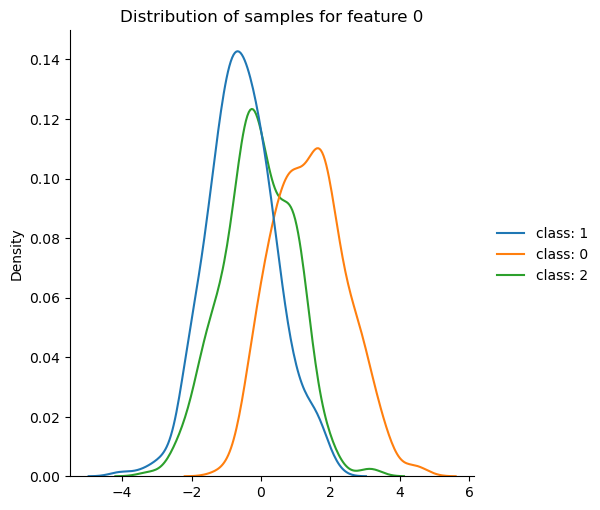

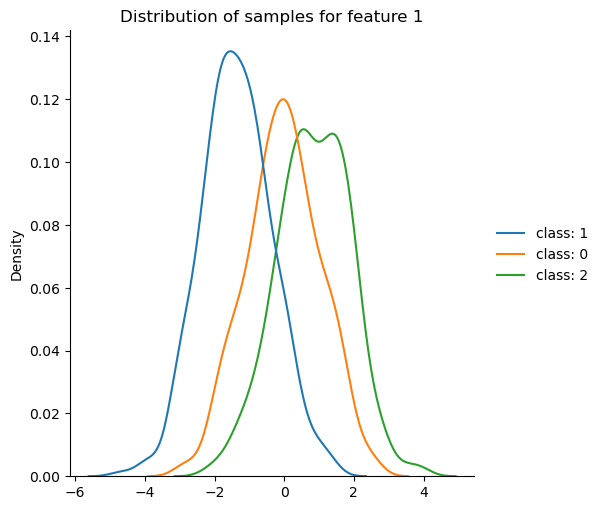

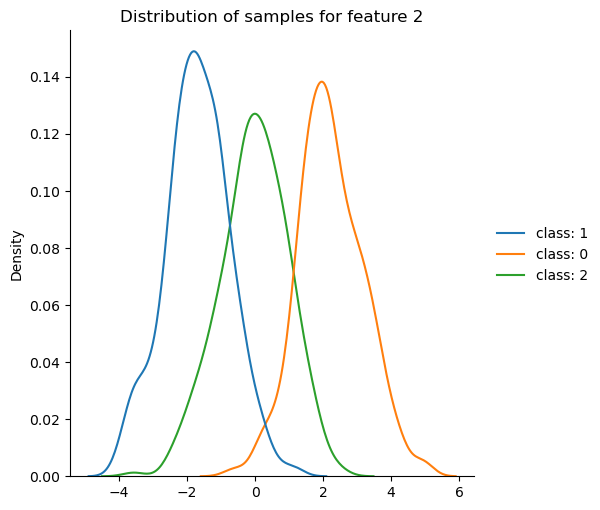

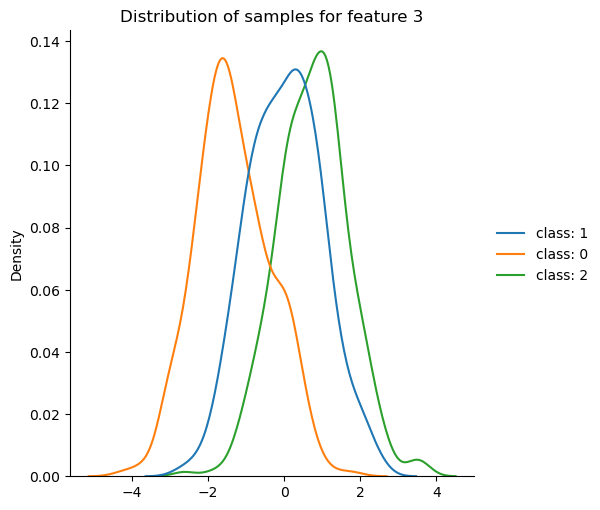

In [33]:
# plot feature distributions for each class
for column_idx in range(X.shape[1]):
    sns.displot(x=X[:, column_idx], hue=[f'class: {y_val}' for y_val in y], kind='kde')
    plt.title(f'Distribution of samples for feature {column_idx}')

Text(0.5, 1.0, 'Pearson Correlation Coefficients for Toy Dataset')

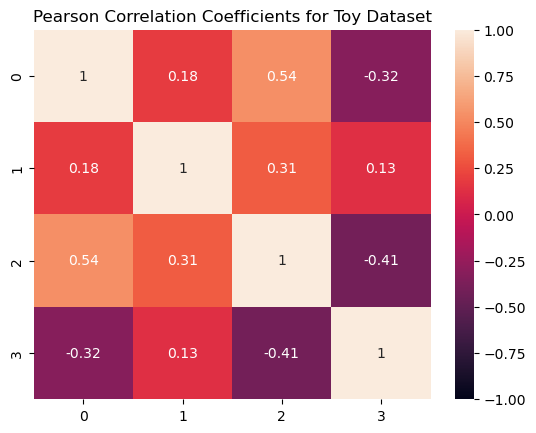

In [34]:
# check for linear correlations. This is important here because naive bayes assumes the feature probabilities to be
# independent
ax = sns.heatmap(np.corrcoef(X.T), annot=True, vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficients for Toy Dataset')

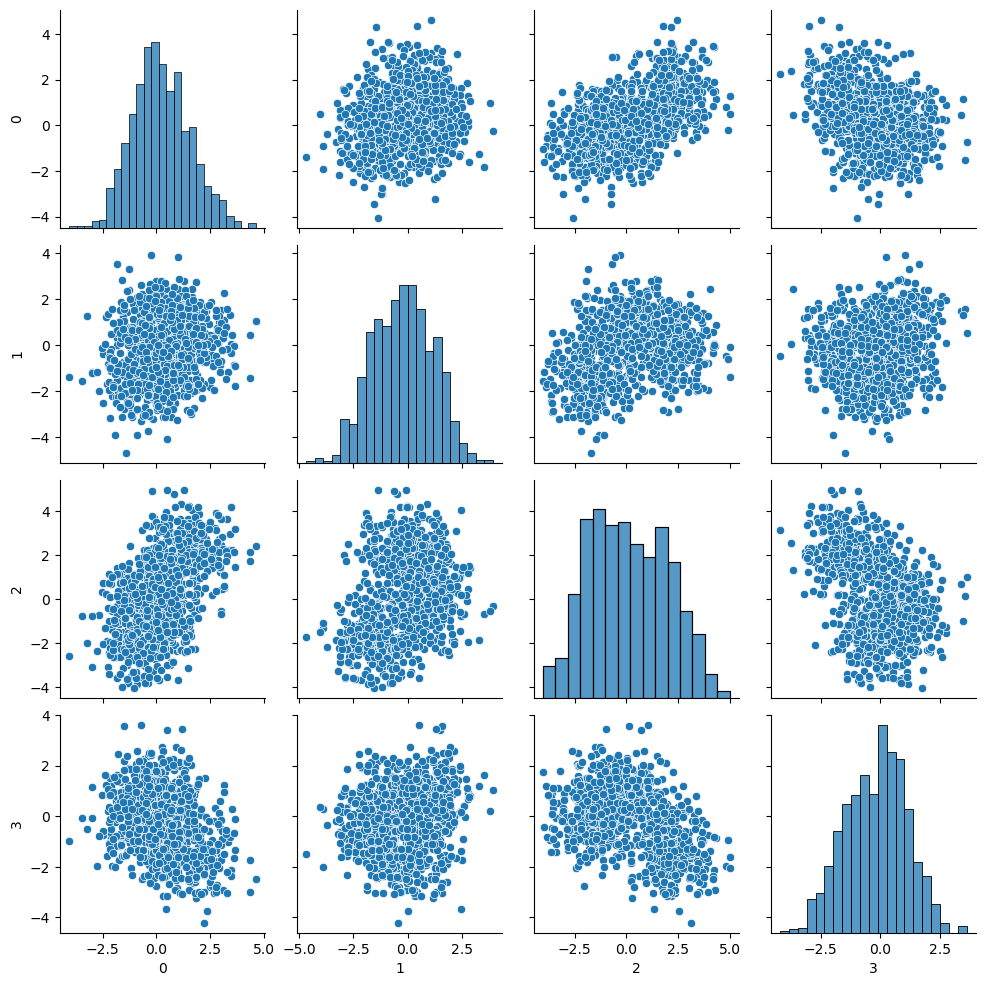

In [35]:
# visual check for multicollinearity
sns.pairplot(pd.DataFrame(X))

In [36]:
# split dataset into train and test sets
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [37]:
# fit model to train data and evaluate on test data 
model = GaussianNaiveBayesClassifer()
model.fit(X_train, y_train)

accuracy = model.accuracy(X_test, y_test)
precision = model.precision(X_test, y_test, average=True)
recall = model.recall(X_test, y_test, average=True)
f1_score = model.f1_score(X_test, y_test)

print(f'''Test accuracy: {accuracy}
Test precision: {precision}
Test recall: {recall}
Test f1_score: {f1_score}''')

Test accuracy: 0.925
Test precision: 0.9263365711126905
Test recall: 0.926491609590201
Test f1_score: 0.9264140838648947
